In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

### 1- Ler arquivo dados.npy
Arquivo de 10500 linhas e 784 colunas, mas cada linha é uma matriz 28x28

In [3]:
X = np.load("dados.npy")

### 2- Imprima a imagem dos 3 primeiros dígitos

Passo 1: cada linha da matriz precisa ser transformada em outra matriz 28x28;

Passo 2: codificação das cores para cinza;

Passo 3: imprimir as 3 primeiras imagens;

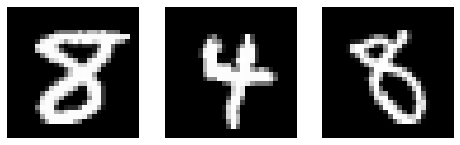

In [4]:
fig=plt.figure(figsize=(8, 8))
for i in range(0, 3):
    img = np.reshape(X[i], (28,28))
    fig.add_subplot(1, 3, i+1)
    img=plt.imshow(img)
    plt.axis('off')
    img.set_cmap('gray')
plt.show()

### 3- Faça a fatoração svd da matrix

Passo 1: normalizar os dados para média O e desvio-padrão diferente de 1;

Passo 2: fazer fatoração full_matrix e compacta;

Passo 3: verificar o tamanho das matrizes;

In [5]:
# Vetor com média zero
X_mean_zero = X - np.mean(X[:])

In [6]:
# Fatoração SVD full matrix
start = time.time()
u, s, vh = np.linalg.svd(X_mean_zero, full_matrices=True, compute_uv=True)
s=np.diag(s)
time_elapsed = time.time() - start
print("Tempo de execução SVD full matrix: {:.3f} seconds".format(time_elapsed))
print(u.shape, s.shape, vh.shape)

Tempo de execução SVD full matrix: 24.553 seconds
(10500, 10500) (784, 784) (784, 784)


In [7]:
# Fatoração SVD compacta
start = time.time()
u_red, s_red, vh_red = np.linalg.svd(X_mean_zero, full_matrices=False, compute_uv=True)
s_red=np.diag(s_red)
time_elapsed = time.time() - start
print("Tempo de execução SVD compacto: {:.3f} seconds".format(time_elapsed))
print(u_red.shape, s_red.shape, vh_red.shape)

Tempo de execução SVD compacto: 1.448 seconds
(10500, 784) (784, 784) (784, 784)


### 4- SVD truncado

Usar a redução para 100 dimensões;

Computar a matriz projetada. Será 10500 por 100. Apenas imprimir as dimensões;

Computar a matriz reconstruída.Será 10500 por 784. Apenas imprimir as dimensões;


In [8]:
from sklearn.decomposition import TruncatedSVD

In [9]:
# 4.1
truncated_svd = TruncatedSVD(n_components=100)
start = time.time()
truncated_svd.fit(X_mean_zero.T)
time_elapsed = time.time() - start
print("Tempo de execução SVD truncado: {:.3f} seconds".format(time_elapsed))
print(truncated_svd.components_.shape)

Tempo de execução SVD truncado: 1.663 seconds
(100, 10500)
